In [1]:
%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt
import os, os.path
from utils.distribution import distr_profile



Bad key text.latex.preview in file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

900
1000
1400
1750
1750
2000


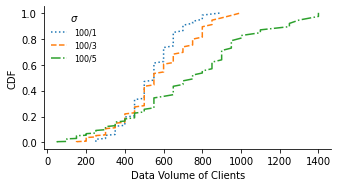

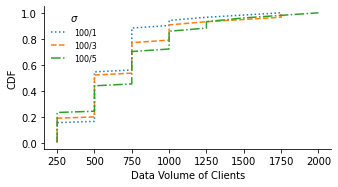

In [7]:
fig_zoom = 0.3
dataset = 'cifar10'
distr = 'zipf'
run = 2

for n_shard in [10, 2]:
    fig, ax = plt.subplots(figsize=(16*fig_zoom, 9*fig_zoom))
    for vi, mk in [(1,':'), (3, '--'), (5, '-.')]:
        file = '{}_dict_users_vi{}_r{}.pkl'.format(distr,vi,run)
        path = 'save/cifar10/data_distr/num100/shard{}/{}'.format(n_shard, file)
        profile = distr_profile(path)
        vol_frac = profile.get_local_vol_frac()
        sorted_vol_frac = vol_frac[profile.get_vol_asc_ID()]
        #ax.plot(range(profile.num_users), np.cumsum(vol_frac), 
        #        mk, label='{}'.format(vi))
        #ax.plot(range(profile.num_users), np.cumsum(sorted_vol_frac), 
        #        mk, label='{}'.format(vi))
        ax.plot(profile.local_vol[profile.get_vol_asc_ID()], np.cumsum(sorted_vol_frac), 
                mk, label='100/{}'.format(vi))
        print(max(profile.local_vol))
        ax.legend(title='$\\sigma$', fontsize=8, frameon=False)
        ax.set_ylabel('CDF')
        ax.set_xlabel('Data Volume of Clients')
        # Hide the right and top spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    
        fig.tight_layout()
        fig_name = 'vol_cdf_{}_s{}_xvol'.format(distr, n_shard)
        #fig_name = 'vol_cdf_zipf_s{}_sorted'.format(n_shard)
        fig_dir = os.path.join('save', dataset, 'fig', 'sigma_ver')
        os.makedirs(fig_dir, exist_ok=True)
        fig_path = os.path.join(fig_dir, fig_name)
        fig.savefig('{}.{}'.format(fig_path, 'png'), format='png', transparent=True)
        fig.savefig('{}.{}'.format(fig_path, 'eps'), format='eps', transparent=True)
        #_ =profile.plot_local_distr(n_shard, title=False, legend=False, color=False)